In [1]:
import numpy as np

from facerec.utils import read_csv, find_faces
from facerec.plot import *
from keras.preprocessing.image import image_utils

img = image_utils

import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

emotions = ["Marah", "Jijik", "Takut", "Senang", "Sedih", "Terkejut", "Biasa Saja"]

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


read csv FER2013

In [2]:
images, labels, usage = read_csv("../dataset/Fer2013/fer2013.csv")
print(len(images))

35887


In [3]:
# membersihkan data latih berdasarkan wajah yang tersedia
from facerec.utils import find_faces
images_train = []
labels_train = []

for i in range(len(usage)):
	if usage[i] == "Training":
		img = np.array(images[i], dtype="uint8").reshape(48,48,1)
		val = find_faces(img, "haarcascade_frontalface_alt", crop=False)
		if np.sum(val) !=0 :
			images_train.append(np.asarray(img))
			labels_train.append(labels[i])

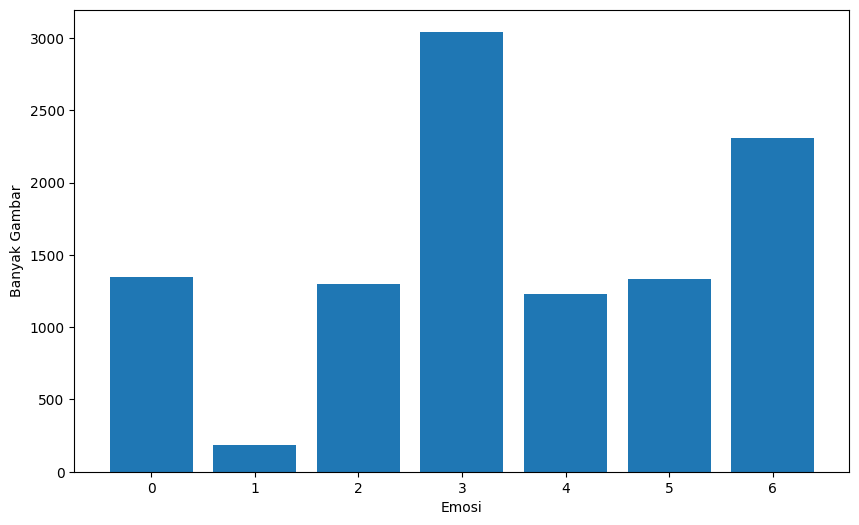

In [4]:
plot_data_labels(labels_train)

melakukan mean sampling dengan mencari rata-rata data (total_data / banyak kelas)

jika data di kelas lebih dari rata-rata maka di lakukan downsampling
jika data di kelas kurang dari rata-rata maka di lakukan upsampling

data upsampling di peroleh dari data acak dari kelas tersebut lalu di lakukan augmentasi

In [5]:
# rata_rata data
mean = np.mean(np.sum(np.unique(labels_train, return_counts=True)[1])/7)
print(mean)

1535.0


In [6]:
# method augmentasi

def augment(img, met):
	# nilai random untuk value augmentasi
	rand = np.random.rand(1)
	if met==0:
		img = tf.image.adjust_brightness(img, rand)
		return img
	else :
		img = tf.image.flip_left_right(img)	
		return img
	

In [7]:
# updown sampling
res_images, res_labels = [],[]

for i in range(7):
	count = 0 
	imgs, lbls =[],[]
	for j,lbl in enumerate(labels_train):
		if 	lbl == i:
			count+=1
			imgs.append(images_train[j])
			lbls.append(lbl)
	if count <= mean:
		for k in range(int(mean)):
			label = np.random.randint(2)
			try:
				res_images.append(imgs[k])
				res_labels.append(lbls[k])
			except :
				r_c = np.random.randint(count)
				res_images.append(np.array(augment(imgs[r_c], label)))
				res_labels.append(lbls[r_c])
		print(str(count) + " TRUE")
	else :
		for k in range(int(mean)):
			res_images.append(imgs[k])
			res_labels.append(lbls[k])
		print(str(count) + " False")

1350 TRUE
183 TRUE
1299 TRUE
3043 False
1227 TRUE
1336 TRUE
2307 False


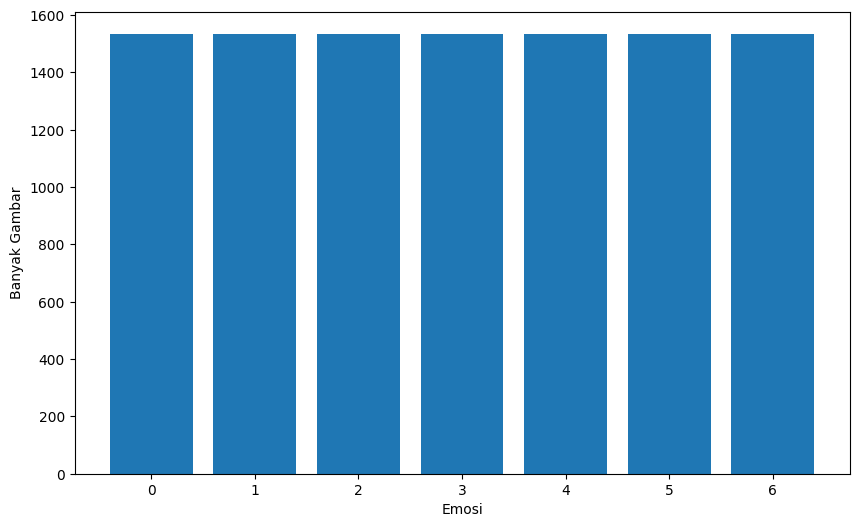

In [8]:
plot_data_labels(res_labels)

In [9]:
np.savez_compressed('../dataset/Fer2013_Training.npz', x=res_images, y=res_labels)

In [10]:
# load data PrivateTest lalu simpan ke npz
images_test, labels_test =[],[]
for i in range(len(usage)):
	# if str(usage[i]).endswith("Test"):
	if usage[i] == "PrivateTest":
		img = np.array((images[i]), dtype='uint8').reshape(48,48,1)
		val = find_faces(img, "haarcascade_frontalface_alt", crop=False)
		if np.sum(val) != 0:
			images_test.append(np.asarray(img))
			labels_test.append(labels[i])

print(len(images_test))

1347


In [11]:
np.savez_compressed("../dataset/Fer2013_PrivateTest.npz", x = images_test, y=labels_test)

In [12]:
# load data PublicTest lalu simpan ke npz
_images_test, _labels_test =[],[]
for i in range(len(usage)):
	# if str(usage[i]).endswith("Test"):
	if usage[i] == "PublicTest":
		img = np.array((images[i]), dtype='uint8').reshape(48,48,1)
		val = find_faces(img, "haarcascade_frontalface_alt", crop=False)
		if np.sum(val) != 0:
			_images_test.append(np.asarray(img))
			_labels_test.append(labels[i])

print(len(_images_test))

1359


In [13]:
np.savez_compressed("../dataset/Fer2013_PublicTest.npz", x = _images_test, y=_labels_test)